# Import Libraries and Save data

In [ ]:
# @title Package Imports
import torch
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pywt

import glob
import os
import csv
from google.colab import files
import re
from tqdm import tqdm

from skimage.feature import greycomatrix, greycoprops

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, GlobalMaxPooling2D

In [ ]:
# @title Download Dataset from Kaggle (A kaggle.json should be downloaded by your Kaggle's account)
print('Upload kaggle.json account information to download the dataset:')
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d asheniranga/leaf-disease-dataset-combination
!unzip -q leaf-disease-dataset-combination.zip

Upload kaggle.json account information to download the dataset:


Saving kaggle.json to kaggle.json
100% 759M/761M [00:05<00:00, 99.0MB/s]
100% 761M/761M [00:05<00:00, 138MB/s] 


In [ ]:
# @title Determine Path
data_path = '/content/image data'
class_names=os.listdir(data_path)
class_names

['validation', 'train', 'test']

In [ ]:
# @title Save Data
chosen_fruit = 'apple'
files = []
labels = []

for r, d, f in os.walk(data_path):
  if r.split('/')[-2] == chosen_fruit:
    for file in f:
      files.append(os.path.join(r, file))
      label = r.split('/')[-1]
      labels.append(label)

In [ ]:
# @title Another Way to Save Data
'''
chosen_fruit = 'apple'

train_files = []
train_labels = []
val_files = []
val_labels = []
test_files = []
test_labels = []

for _class in class_names:
  class_path = os.path.join(data_path, _class)
  for r, d, f in os.walk(class_path):
    if r.split('/')[-2] == chosen_fruit and _class == 'train':
      for file in f:
        train_files.append(file)
        label = r.split('/')[-1]
        train_labels.append(label)
    elif r.split('/')[-2] == chosen_fruit and _class == 'val':
      for file in f:
        val_files.append(file)
        label = r.split('/')[-1]
        val_labels.append(label)
    elif r.split('/')[-2] == chosen_fruit and _class == 'test':
      for file in f:
        test_files.append(file)
        label = r.split('/')[-1]
        test_labels.append(label)
'''

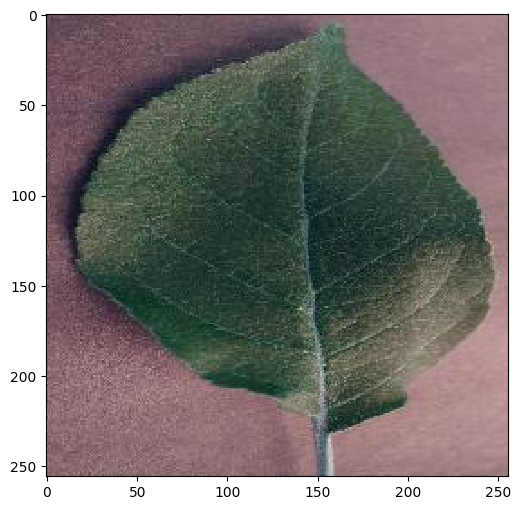

In [ ]:
# @title Show an Example
fig = plt.figure(figsize=(6, 6))
img = cv2.imread(files[0])
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

# Getting Familiar with Haralick Texture Feature Extraction
Representation of pixel arrangement in the image

<function matplotlib.pyplot.show(close=None, block=None)>

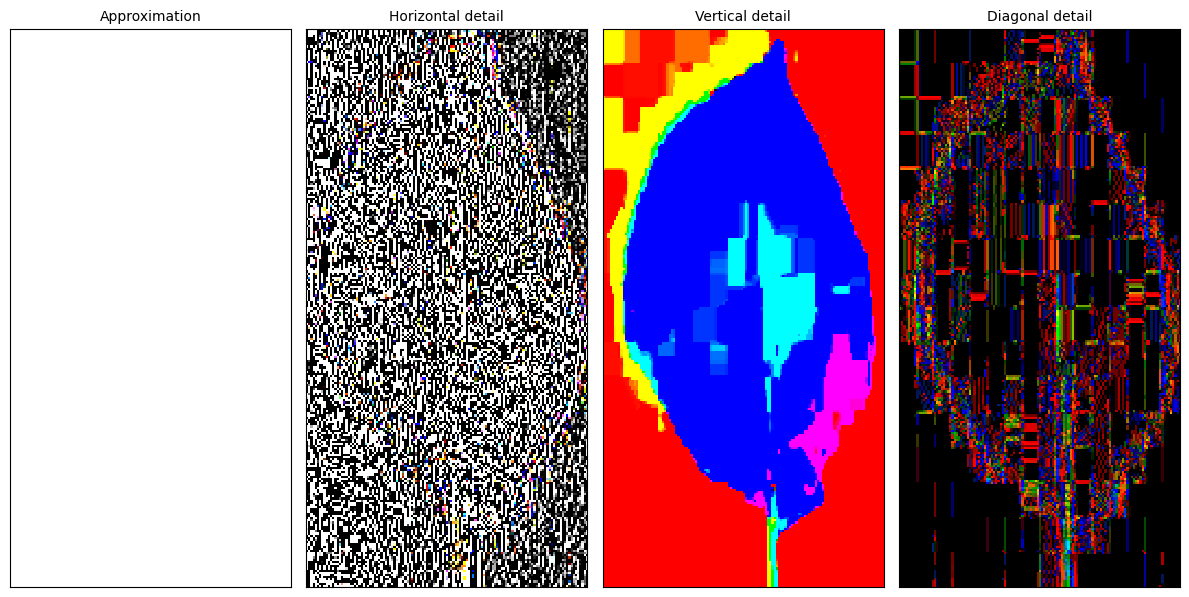

In [ ]:
# @title Show an Example of Waveform Transfer in Python
titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(img, 'db2')

LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1, 4, i+1)
  ax.imshow(a, interpolation='nearest', cmap=plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

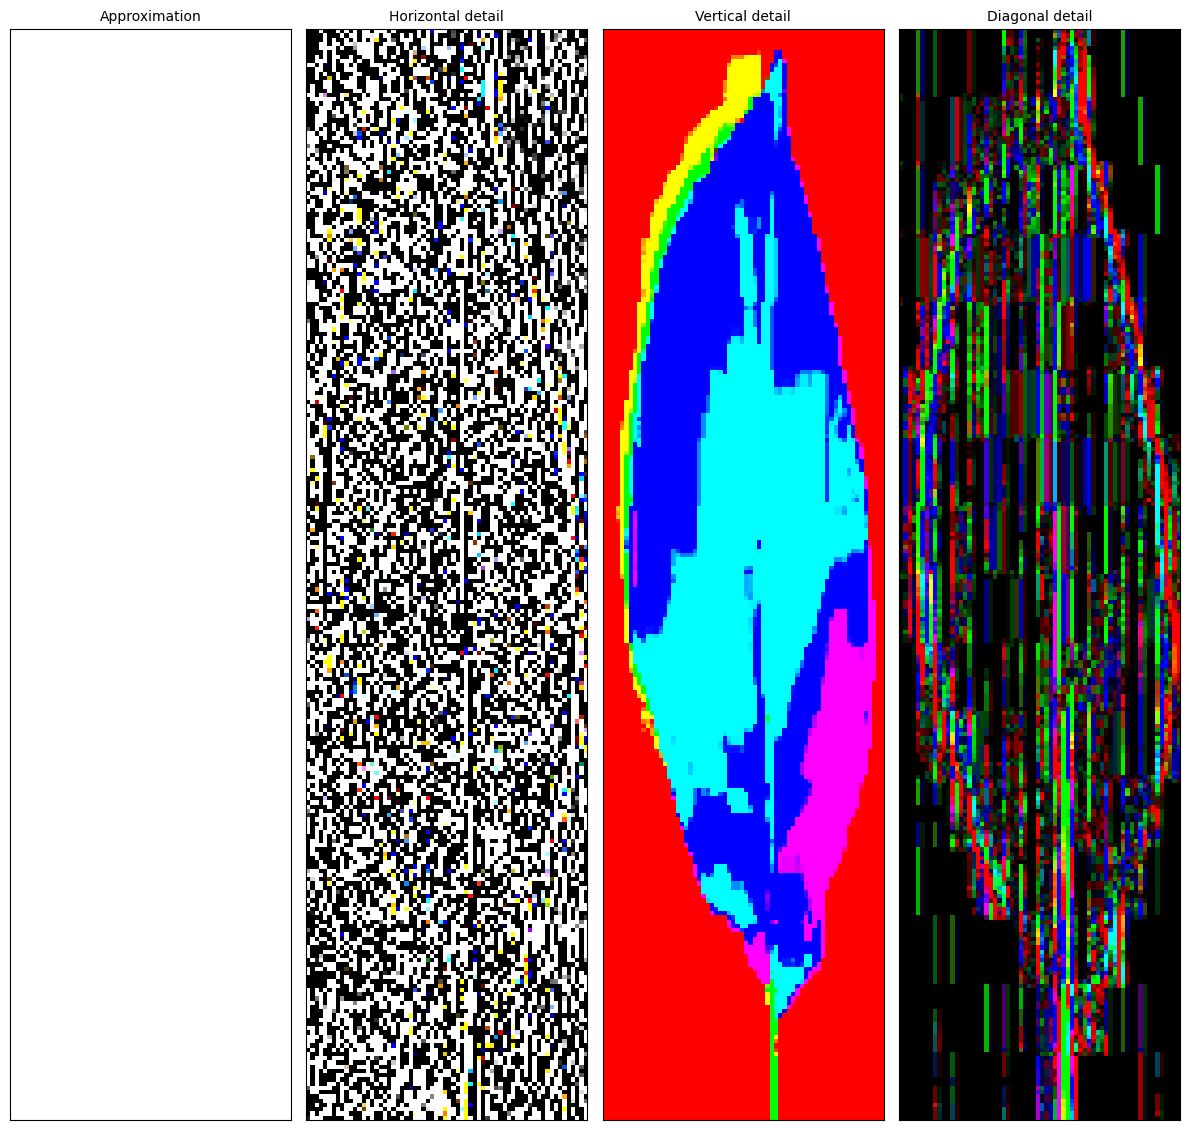

In [ ]:
# @title Show previous Example in Second Level of Waveform Transfer
coeffs3 = pywt.dwt2(LL, 'db2')

LL2, (LH2, HL2, HH2) = coeffs3

fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL2, LH2, HL2, HH2]):
  ax = fig.add_subplot(1, 4, i+1)
  ax.imshow(a, interpolation='nearest', cmap=plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()
plt.show

In [ ]:
LL1 = coeffs2[0]
LL2 = coeffs3[0]
LH1, HL1, HH1 = list(coeffs2[1])
LH2, HL2, HH2 = list(coeffs3[1])
g = []
g.append(greycomatrix(np.uint8(LL1[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LL1[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LL1[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH1[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH1[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH1[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL1[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL1[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL1[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH1[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH1[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH1[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LL2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LL2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LL2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(LH2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HL2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
g.append(greycomatrix(np.uint8(HH2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

In [ ]:
con = []
enr = []
dis = []
hom = []
for t in range(0, len(g)):
  con.append(greycoprops(np.array(g[t]), 'contrast'))
  enr.append(greycoprops(np.array(g[t]), 'energy'))
  dis.append(greycoprops(np.array(g[t]), 'dissimilarity'))
  hom.append(greycoprops(np.array(g[t]), 'homogeneity'))

con_features = np.reshape(np.array(con).ravel(), (1, len(np.array(con).ravel())))
enr_features = np.reshape(np.array(enr).ravel(), (1, len(np.array(enr).ravel())))
dis_features = np.reshape(np.array(dis).ravel(), (1, len(np.array(dis).ravel())))
hom_features = np.reshape(np.array(hom).ravel(), (1, len(np.array(hom).ravel())))

features = np.concatenate((con_features, enr_features, dis_features, hom_features), axis = 1)

# Extract Features for All Photos with Haralick Texture Feature Extraction

In [ ]:
with open('features.csv', 'a+', newline="") as wr:
  writer = csv.writer(wr)
  for index, f in enumerate(files):
    img = cv2.imread(f)
    coeffs2 = pywt.dwt2(img, 'db2')
    LL, (LH, HL, HH) = coeffs2

    g = []
    con = []
    enr = []
    dis = []
    hom = []

    g.append(greycomatrix(np.uint8(LL[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LL[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LL[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    for t in range(0, len(g)):
      con.append(greycoprops(np.array(g[t]), 'contrast'))
      enr.append(greycoprops(np.array(g[t]), 'energy'))
      dis.append(greycoprops(np.array(g[t]), 'dissimilarity'))
      hom.append(greycoprops(np.array(g[t]), 'homogeneity'))
    con_features = np.reshape(np.array(con).ravel(), (1, len(np.array(con).ravel())))
    enr_features = np.reshape(np.array(enr).ravel(), (1, len(np.array(enr).ravel())))
    dis_features = np.reshape(np.array(dis).ravel(), (1, len(np.array(dis).ravel())))
    hom_features = np.reshape(np.array(hom).ravel(), (1, len(np.array(hom).ravel())))
    features = np.concatenate((con_features, enr_features, dis_features, hom_features), axis = 1)

    label = np.expand_dims(np.array([labels[index]]), axis=1)
    features = np.concatenate((features, label), axis = 1)

    writer.writerow(features[0])
  wr.close()
'''    g.append(greycomatrix(np.uint8(LL2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LL2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LL2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(LH2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HL2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH2[:, :, 0]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH2[:, :, 1]), [1], [0], levels=256, normed=True, symmetric=True))
    g.append(greycomatrix(np.uint8(HH2[:, :, 2]), [1], [0], levels=256, normed=True, symmetric=True))
    '''

# Preprocess Data

In [ ]:
features_db = pd.read_csv('features.csv', header=None)
features_db.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2958.014313,3566.785950,2667.196045,31120.889313,31215.725525,31332.975250,1213.517761,1982.263123,977.583374,1326.288757,...,0.162720,0.164758,0.163403,0.694770,0.831749,0.687969,0.955036,0.999008,0.919398,healthy
1,3090.828400,3272.506165,3263.394714,33089.623322,33119.535797,33106.574463,963.571716,1571.154785,1282.604279,665.783020,...,0.170403,0.171553,0.171537,0.769169,0.839011,0.743268,0.974668,0.999100,0.943293,healthy
2,5690.676575,5928.882629,6508.893646,23475.831848,23435.222900,23408.376221,1998.549438,1844.274384,1150.082977,1289.893311,...,0.079174,0.079958,0.079283,0.776387,0.814761,0.709809,0.957349,0.996491,0.932615,healthy
3,4838.194977,4958.662506,2002.367950,27429.404480,27015.365723,26737.158112,2031.374817,1251.895294,1623.420135,965.025543,...,0.146397,0.154574,0.154841,0.716806,0.821253,0.702064,0.965454,0.997559,0.933342,healthy
4,2939.843414,3612.364532,2121.423950,30262.606750,30457.100677,30580.635468,1904.470459,1097.785645,1111.752502,1178.155609,...,0.164582,0.166283,0.164784,0.673206,0.777423,0.670773,0.956257,0.998474,0.917168,healthy


In [ ]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(features_db[len(features_db.columns)-1]))}
class_mapping

{'apple scab': 0, 'black rot': 1, 'cedar apple rust': 2, 'healthy': 3}

In [ ]:
features_db[len(features_db.columns)-1] = features_db[len(features_db.columns)-1].map(class_mapping)

In [ ]:
features_db.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2958.014313,3566.785950,2667.196045,31120.889313,31215.725525,31332.975250,1213.517761,1982.263123,977.583374,1326.288757,...,0.162720,0.164758,0.163403,0.694770,0.831749,0.687969,0.955036,0.999008,0.919398,3
1,3090.828400,3272.506165,3263.394714,33089.623322,33119.535797,33106.574463,963.571716,1571.154785,1282.604279,665.783020,...,0.170403,0.171553,0.171537,0.769169,0.839011,0.743268,0.974668,0.999100,0.943293,3
2,5690.676575,5928.882629,6508.893646,23475.831848,23435.222900,23408.376221,1998.549438,1844.274384,1150.082977,1289.893311,...,0.079174,0.079958,0.079283,0.776387,0.814761,0.709809,0.957349,0.996491,0.932615,3
3,4838.194977,4958.662506,2002.367950,27429.404480,27015.365723,26737.158112,2031.374817,1251.895294,1623.420135,965.025543,...,0.146397,0.154574,0.154841,0.716806,0.821253,0.702064,0.965454,0.997559,0.933342,3
4,2939.843414,3612.364532,2121.423950,30262.606750,30457.100677,30580.635468,1904.470459,1097.785645,1111.752502,1178.155609,...,0.164582,0.166283,0.164784,0.673206,0.777423,0.670773,0.956257,0.998474,0.917168,3


In [ ]:
X = features_db[[_ for _ in range(len(features_db.columns))]].values
Y = features_db[[len(features_db.columns) - 1]].values

In [ ]:
X.shape, Y.shape

((3171, 49), (3171, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
# @title Scale data with StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train.shape, X_test.shape

((2536, 49), (635, 49))

In [ ]:
# @title PCA (Without running this cell, better result will be get)
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
X_train.shape, X_test.shape

((2536, 20), (635, 20))

# Try Two Models: Perceptron and Logistic Regression

In [ ]:
# @title Perceptron Model
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
ppn = Perceptron(eta0=0.01, random_state=42)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.978208707689169, 0.9779527559055118, 0.977873637937407, None)

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [ ]:
# @title LogisticRegression Model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=42)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1.0, 1.0, 1.0, None)

In [ ]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00
